# Classifying flowers with Decision Trees

* If our problem is about classification, we will use a `DecisionTreeClassifier`.

* We will use the [famous Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which was introduced by Ronald Fisher in 1936.

<table>
    <tr>
        <td>
            <img width="200"
                src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg"/>
        </td>
        <td>
            <img width="200" src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg"/>
        </td>
        <td>
            <img width="200" src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg"/>
        </td>
    </tr>
    <tr>
        <td>Iris Setosa</td>
        <td>Iris Versicolor</td>
        <td>Iris Virginica</td>
    </tr>
</table>

* Data included in scikit-learn.

* The goal is to predict the type of flower based on the length and width of the petal and sepal.

In [2]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

* Because the data is ordered by the class we want to predict we will shuffle the data.

* Otherwise we proceed with the creation and application of the tree.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

X, y = shuffle(iris.data.values, iris.target.values, random_state=0)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier()

* We will draw the decision tree again.

* The color of each node corresponds to the class of the majority in the node.

In [4]:
from io import StringIO
from sklearn import tree
import pydotplus
from IPython.display import Image 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

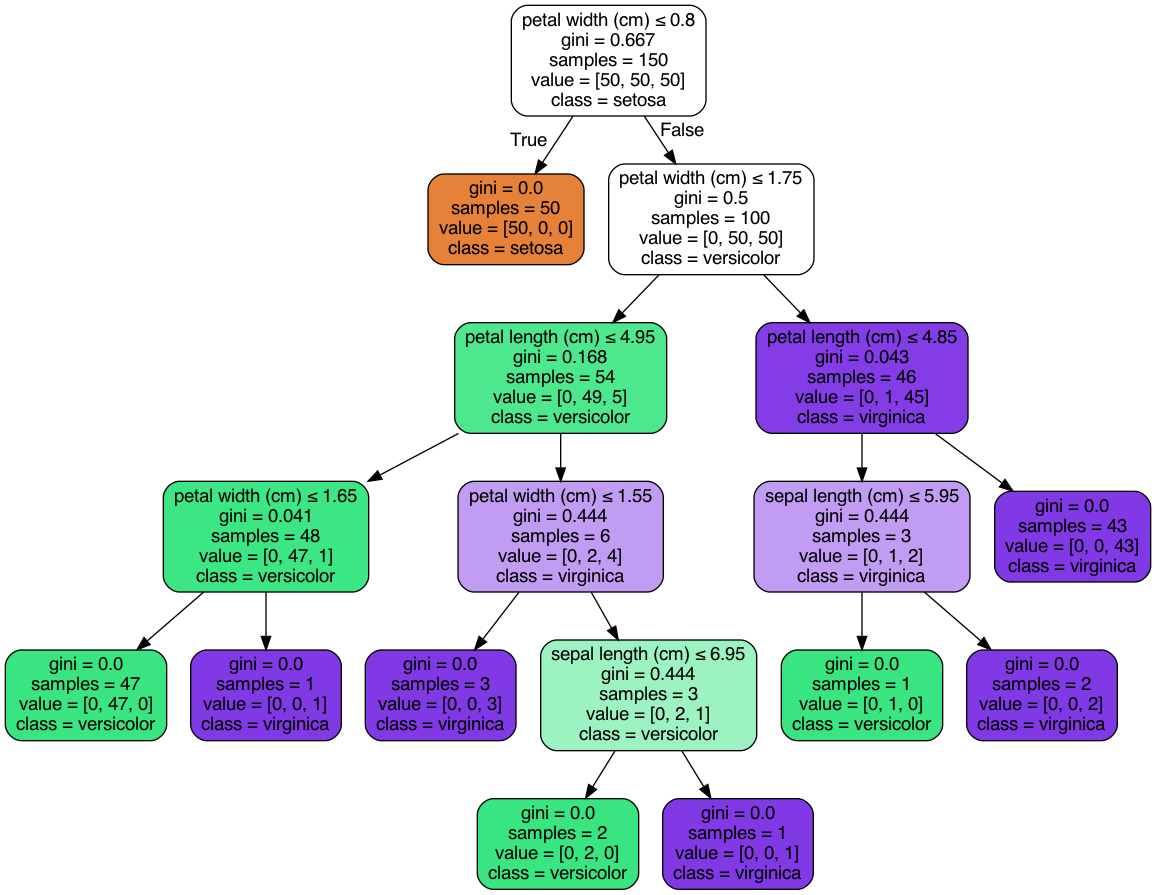

In [5]:
Image(graph.create_png(), width=700) 

* In decision trees there are two ways to measure the homogeneity of the elements of a node: gini, entropy.

* These are hyperparameters.

* Let's look at them in another, larger data set.

* The data, also included in scikit-learn, is about forest cover type, based on various attributes.

In [6]:
from sklearn.datasets import fetch_covtype

fcover = fetch_covtype(as_frame=True)

fcover.data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
fcover.target

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

* We will keep 25% for checking.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fcover.data, fcover.target,
                                                   test_size=0.25, random_state=0)

* We will look for the best criterion as well as the optimal depth.

In [9]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(10, 20+1))
max_depth.append(None)

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': max_depth
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy', 'max_depth': None}


* As usual, we can see the classification report.

In [10]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52943
           2       0.95      0.95      0.95     70897
           3       0.93      0.93      0.93      8890
           4       0.84      0.82      0.83       704
           5       0.84      0.84      0.84      2340
           6       0.89      0.88      0.89      4384
           7       0.95      0.95      0.95      5095

    accuracy                           0.94    145253
   macro avg       0.91      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253

